In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import matplotlib.pyplot as plt

In [32]:
import joblib

In [2]:
url = "http://research.jisao.washington.edu/data/sahel/sahelprecip19012017"

In [15]:
df = pd.read_csv(url, delim_whitespace=True, skiprows=7)

In [29]:
df.index.name = 'Year'

In [30]:
df.columns

Index(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
       'nov', 'dec', 'Annual'],
      dtype='object')

In [38]:
columns_drop = ['jan', 'feb', 'mar', 'apr', 'oct', 'nov', 'dec']
df = df.drop(columns=columns_drop)

In [39]:
df['Annual'] = np.sum(df.loc[:, 'may':'sep'], axis=1) /10

In [40]:
df

,may,jun,jul,aug,sep,Annual
Year,,,,,,
1901,115,299,346,607,232,159.9
1902,115,25,330,14,-321,16.3
1903,202,-43,142,714,20,103.5
1904,189,226,436,-27,-241,58.3
1905,15,352,227,157,289,104.0
...,...,...,...,...,...,...
2013,-75,-56,-152,389,76,18.2
2014,346,53,-214,184,179,54.8
2015,-90,-101,371,567,378,112.5


In [24]:
df.to_csv("sahel.csv")

In [41]:
joblib.dump(df, "sahel_df.joblib")

['sahel_df.joblib']

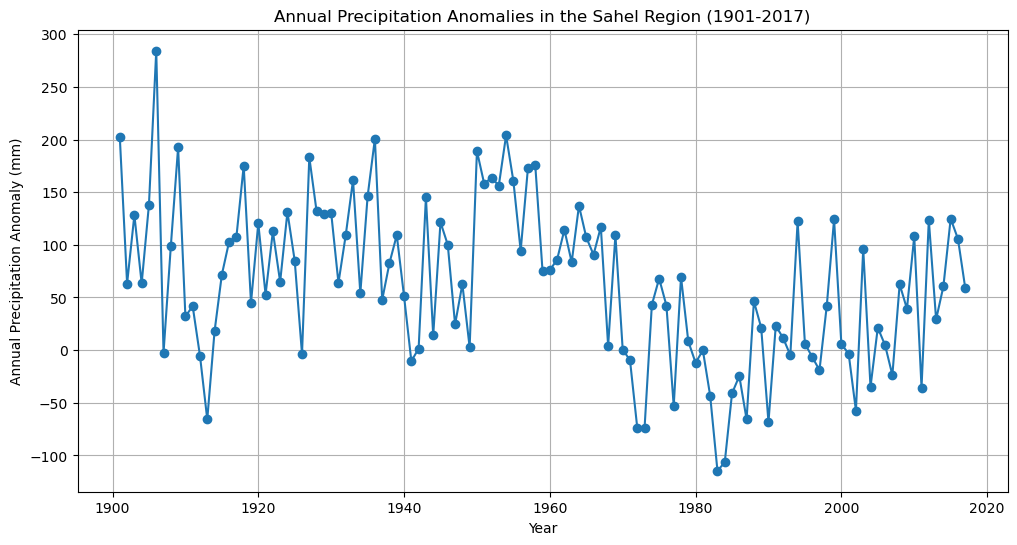

In [31]:
# Plotting the corrected annual precipitation anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Annual'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Annual Precipitation Anomaly (mm)')
plt.title('Annual Precipitation Anomalies in the Sahel Region (1901-2017)')
plt.grid(True)
plt.show()